**Initially mounting the google drive**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Using Pandas library to load the CSV file and many more useful functions**

In [2]:
import pandas as pd

In [10]:
path = '/content/gdrive/MyDrive/sensorreadings (25).csv'
ssr = pd.read_csv(path)


**This is the data present in the CSV file**

In [4]:
ssr

,Time stamp,Meter ID,R phase,Y phase,B phase,Total pow
0,15-03-2021 10:35,101,14.8639,16.6759,16.2646,47.8045
1,15-03-2021 10:36,101,14.8976,16.5786,16.3201,47.7964
2,15-03-2021 10:37,101,14.9082,16.5838,16.3254,47.8175
3,15-03-2021 10:38,101,14.9214,16.6692,16.2829,47.8737
4,15-03-2021 10:39,101,14.8908,16.7536,16.2214,47.8659
...,...,...,...,...,...,...
1048570,31-01-2021 16:50,3,3.4071,3.4252,6.8513,13.6837
1048571,31-01-2021 16:51,3,3.4205,3.4414,6.8253,13.6874
1048572,31-01-2021 16:52,3,3.3864,3.4255,6.8174,13.6294
1048573,31-01-2021 16:53,3,3.5006,3.4191,6.8469,13.7667


**Filtering the data and considering only meter 101 data**


In [5]:
ssr_meterid_101=ssr[ssr['Meter ID'] == 101]

**Meter 101 data**

In [6]:
ssr_meterid_101

,Time stamp,Meter ID,R phase,Y phase,B phase,Total pow
0,15-03-2021 10:35,101,14.8639,16.6759,16.2646,47.8045
1,15-03-2021 10:36,101,14.8976,16.5786,16.3201,47.7964
2,15-03-2021 10:37,101,14.9082,16.5838,16.3254,47.8175
3,15-03-2021 10:38,101,14.9214,16.6692,16.2829,47.8737
4,15-03-2021 10:39,101,14.8908,16.7536,16.2214,47.8659
...,...,...,...,...,...,...
123917,29-01-2021 14:01,101,13.3863,14.5399,14.6906,42.6169
123918,29-01-2021 14:03,101,13.2620,14.4711,14.7015,42.4347
123919,29-01-2021 14:04,101,13.2584,14.4984,14.6369,42.3938
123920,29-01-2021 14:05,101,13.2532,14.5372,14.6250,42.4155


**Deleting the time stamp column as it is behaving as a string which cannot be passed through the KMeans function**

In [7]:
del ssr_meterid_101[ssr_meterid_101.columns[0]]
ssr_meterid_101


,Meter ID,R phase,Y phase,B phase,Total pow
0,101,14.8639,16.6759,16.2646,47.8045
1,101,14.8976,16.5786,16.3201,47.7964
2,101,14.9082,16.5838,16.3254,47.8175
3,101,14.9214,16.6692,16.2829,47.8737
4,101,14.8908,16.7536,16.2214,47.8659
...,...,...,...,...,...
123917,101,13.3863,14.5399,14.6906,42.6169
123918,101,13.2620,14.4711,14.7015,42.4347
123919,101,13.2584,14.4984,14.6369,42.3938
123920,101,13.2532,14.5372,14.6250,42.4155


**Using the ELBOW method to find the number of optimal clusters so that we can use that in KMeans algorithm**

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(ssr_meterid_101)
    distortions.append(kmeanModel.inertia_)

**From the plot we can see that optimal cluster for our ssr_meterid_101 data is 4 as the curve is straight after n=4**

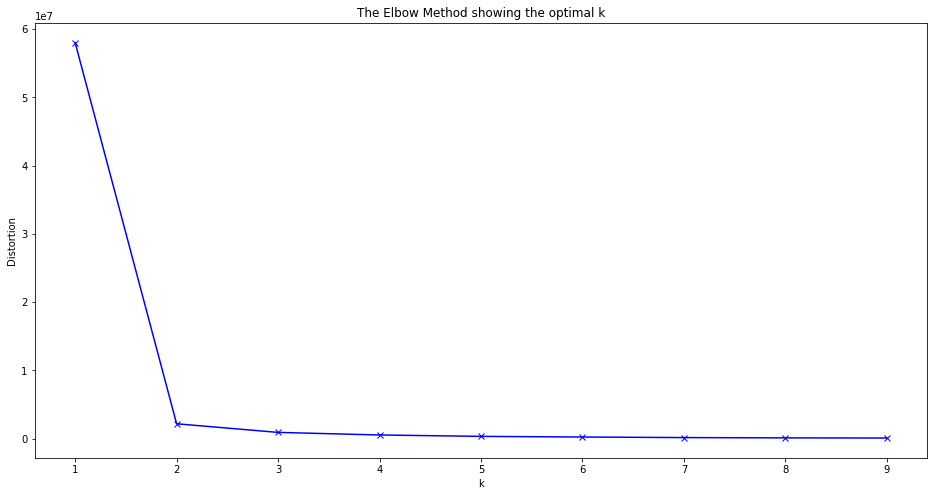

In [9]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

**Implementing the K- means Algorithm for n=4 clusters**


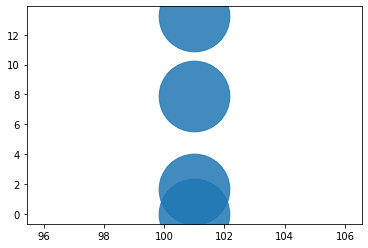

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
k_res=KMeans(n_clusters=4).fit(ssr_meterid_101)
clusters=k_res.cluster_centers_
plt.scatter(clusters[:,0],clusters[:,1],s=5000,alpha=0.85)